# Encypt and Image with AES and the ECB mode

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

In [9]:
img = Image.open('./images.jpg')
img = np.array(img)


In [17]:
print("Image shape : ",img.shape)
print("Image type: ",img.dtype)

Image shape :  (247, 204, 3)
Image type:  uint8


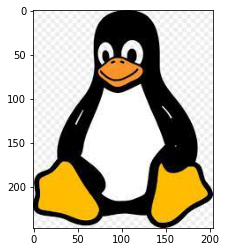

In [16]:
plt.imshow(img,cmap='Greys')

# Convert the image to bytes 

for converting the integers to bytes first we must flattened the image so we can work on on indx and then we will chack if all the integers are unsigned integer of 8 bits


In [26]:
img_flatten = img.flatten()
img_bytes = bytes([x for x in img_flatten])
print(img_bytes[1005:1052])

b'\xf1\xf1\xf1\xe6\xe6\xe6\xe9\xe9\xe9\xf6\xf6\xf6\xf3\xf3\xf3\xfc\xfc\xfc\xf9\xf9\xf9\xf5\xf5\xf5\xf1\xf1\xf1\xef\xef\xef\xf0\xf0\xf0\xf2\xf2\xf2\xf4\xf4\xf4\xfd\xfd\xfd\xfe\xfe\xfe\xff\xff'


# Padding the image

In [27]:
# we must check if we need to do a padding to the image, in other word checking if the size of the image is multiple of 16

block_size = 16

print(f"Bytes reminder= {len(img_bytes) % block_size}")

Bytes reminder= 12


In [34]:
from cryptography.hazmat.primitives import padding
padder = padding.PKCS7(block_size * 8).padder()

img_padded = padder.update(img_bytes) + padder.finalize()
print(f"the reminder for the padded img is = {len(img_padded)% block_size}")

the reminder for the padded img is = 0


# Declare the AES with ECB mode 

In [37]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os

In [38]:
secret_key = os.urandom(32)

cipher = Cipher(algorithms.AES(secret_key),modes.ECB(),default_backend())

encryptor = cipher.encryptor()
decryptor = cipher.decryptor()



In [ ]:
cipher_text = encryptor.update(img_padded) + encryptor.finalize()

In [43]:
print(cipher_text[0:20])

b'}Y\xb4\xb9\xee\xf1\xc4d{f\x92 ^=Z\x9f\xeb\xcch\xdf'


now we will plot the ciphre text and for that we will convert the cipher text into a list of integers


In [75]:
cipher_text_flatten_int = [x for x in cipher_text]
#reshaping the cipher text 
cipher_text_img = np.array(cipher_text_flatten_int)
cipher_text_img = cipher_text_img[:len(cipher_text_img)-4]
cipher_text_img = cipher_text_img.reshape(img.shape)


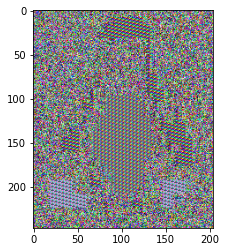

In [107]:
plt.imshow(cipher_text_img)

After reshaping the image and plotting it we see that the image is the same juste there was a diffrence in the colors

so the ECB mode is not the good one

In [89]:
# decrypting the image 
plain_text = decryptor.update(cipher_text) + decryptor.finalize()

In [92]:
plain_text[len(plain_text)-10:]

b'\xfa\xfa\xfa\xfa\xfa\xfa\x04\x04\x04\x04'

In [108]:
plain_text = plain_text[:len(plain_text)-4]

In [110]:
plain_text_img = np.array([x for x in plain_text])

In [115]:
plain_text_img = plain_text_img.reshape(img.shape)

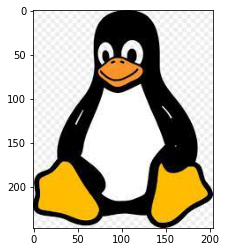

In [117]:
plt.imshow(plain_text_img)

The decryption is very good but the only inconveient is in the cipher text 

so Next we are going to use the CBC mode with a random Init Vector


In [118]:
secret_key = os.urandom(32)
iv = os.urandom(16)

cipher = Cipher(algorithms.AES(secret_key), modes.CBC(iv),default_backend())

encryptor = cipher.encryptor()
decryptor = cipher.decryptor()

In [120]:
cipher_text = encryptor.update(img_padded) + encryptor.finalize()

In [125]:
cipher_text_img = np.array([x for x in cipher_text])
cipher_text_img = cipher_text_img[:len(cipher_text_img)-4].reshape(img.shape)


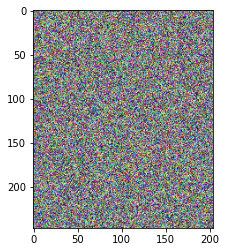

In [128]:
plt.imshow(cipher_text_img)

We see that the image is not interpretable and we cannot guess what it contains and this is due to the CBC mode of operation

**Now we will decrypt the image** :

In [129]:
plain_text = decryptor.update(cipher_text) + decryptor.finalize()

In [130]:
plain_text_img = np.array([x for x in plain_text])
plain_text_img = plain_text_img[:len(plain_text_img)-4].reshape(img.shape)


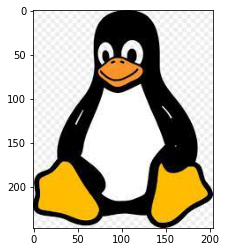

In [135]:
plt.imshow(plain_text_img)

# Conclusion

The ECB mode is not good to operate as every byte in the plaintext is converted to the same byte in the ciphertext and so it would not work for image encryption